In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

# 0.Data Load
---

In [24]:
df_store = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv")
df_store.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [25]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   br_c      8808 non-null   object
 1   cop_c     8808 non-null   object
 2   zon_hlv   8808 non-null   object
 3   zon_mcls  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


# 1.Values
---

In [26]:
# Number of Unique Values

for col in df_store.columns:
    unq_arr = df_store[col].unique()
    print(f"{col}: {df_store[col].nunique()}\t{['*']+unq_arr[:10] if df_store[col].nunique()>20 else unq_arr}")
    print()
print(f"Total DF Length: {len(df_store)}")

br_c: 8808	['*A010001' '*A010002' '*A010003' '*A010004' '*A010005' '*A010006'
 '*A010007' '*A010008' '*A010009' '*A010010']

cop_c: 11	['A01' 'A02' 'A03' 'A04' 'A05' 'B01' 'C01' 'C02' 'D01' 'D02' 'E01']

zon_hlv: 17	['Z17' 'Z16' 'Z13' 'Z10' 'Z15' 'Z12' 'Z03' 'Z11' 'Z14' 'Z06' 'Z09' 'Z04'
 'Z08' 'Z05' 'Z02' 'Z01' 'Z07']

zon_mcls: 257	['*Z17024' '*Z17018' '*Z17011' '*Z16007' '*Z17005' '*Z13003' '*Z17001'
 '*Z17020' '*Z10003' '*Z15003']

Total DF Length: 8808


- `A01~06` : 유통사
- `B01`: 숙박업종
- `C01~2`: 엔터테인먼트
- `D01~2`: F&B
- `E01`: 렌탈업종

In [27]:
aff_dict = {'A':'유통사','B':'숙박업종','C':'엔터테인먼트',
            'D':'F&B','E':'렌탈업종'}
df_store["cop_c_k"]=df_store["cop_c"].apply(lambda x: aff_dict[x[0]])

In [28]:
df_store.head()

,br_c,cop_c,zon_hlv,zon_mcls,cop_c_k
0,A010001,A01,Z17,Z17024,유통사
1,A010002,A01,Z17,Z17018,유통사
2,A010003,A01,Z17,Z17011,유통사
3,A010004,A01,Z16,Z16007,유통사
4,A010005,A01,Z17,Z17005,유통사


# 2.Visualization
---

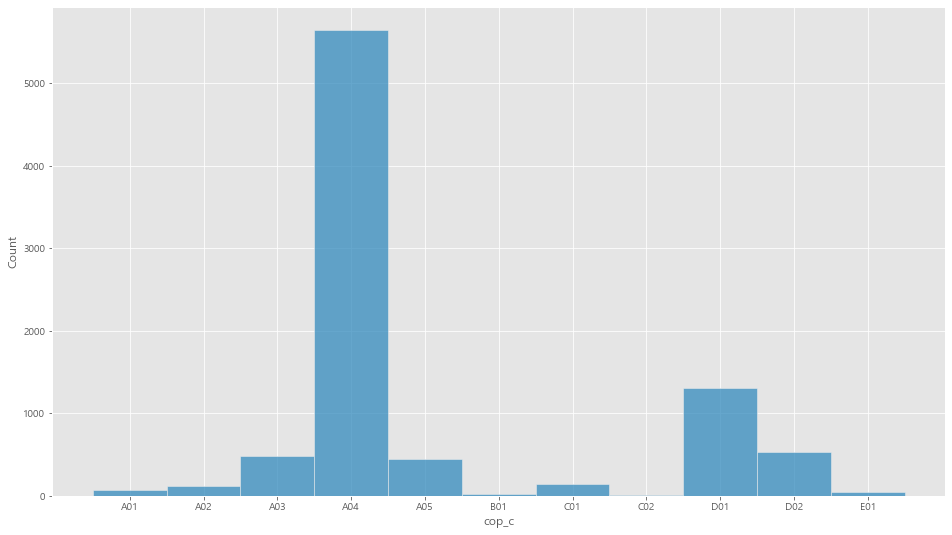

In [29]:
sns.histplot(df_store["cop_c"])
plt.show()

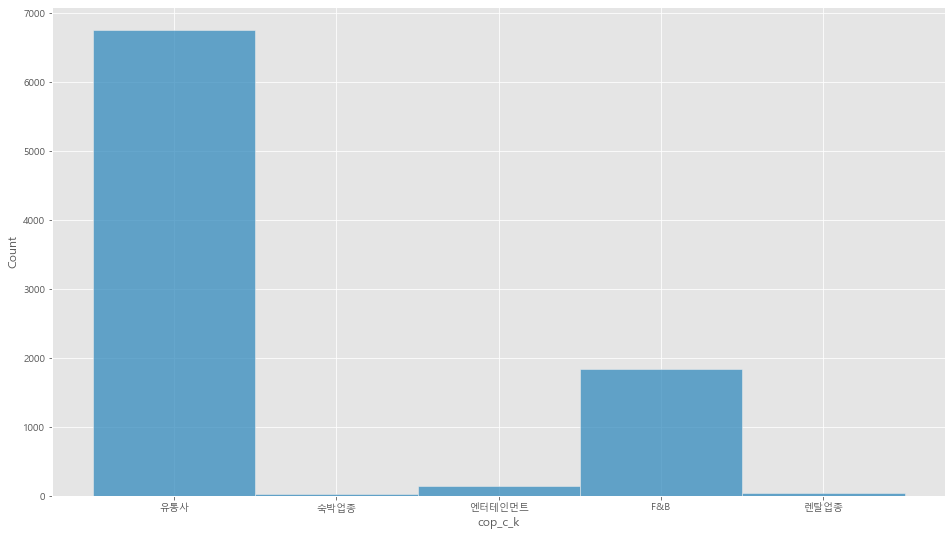

In [30]:
sns.histplot(df_store["cop_c_k"])
plt.show()

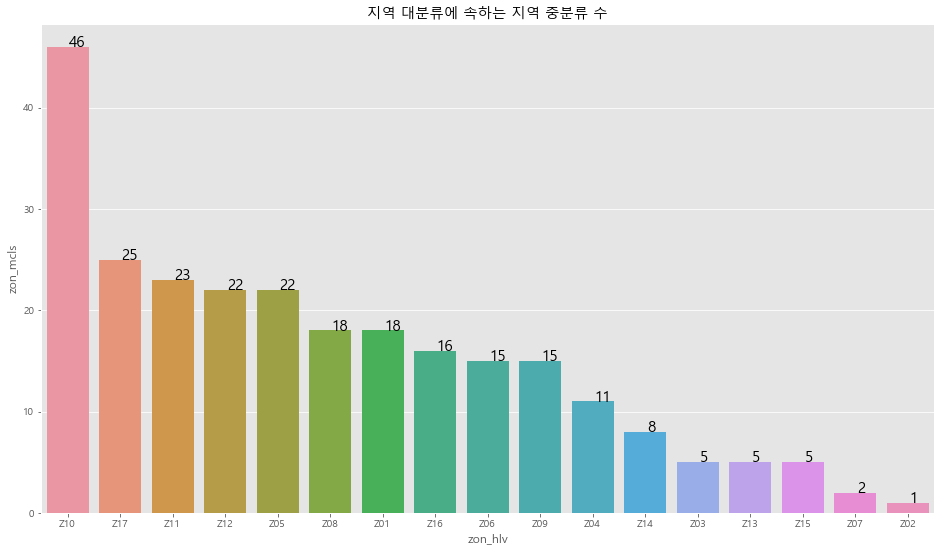

In [31]:
df_zn = df_store.groupby(by=["zon_hlv","zon_mcls"], as_index=False).count()[["zon_hlv","zon_mcls"]]
df_zn_grp = df_zn.groupby(by=["zon_hlv"],as_index=False).count().sort_values(by="zon_mcls", ascending=False)
sns.barplot(x=df_zn_grp["zon_hlv"], y=df_zn_grp["zon_mcls"])
x_loc = 0.03
for val in df_zn_grp["zon_mcls"]:
    plt.text(x=x_loc, y=val, s=f"{val}", size=15)
    x_loc+=1
plt.title("지역 대분류에 속하는 지역 중분류 수")
plt.show()

# 3.Guess Region
---

## 3.1.외부 데이터 활용
---

In [32]:
df_pop = pd.read_csv("../LPOINT_BIG_COMP/행정구역_시군구_별_주민등록세대수_20220706160558.csv", encoding="cp949")
df_pop

,행정구역(시군구)별,2022.03
0,전국,23590069
1,서울특별시,4451444
2,종로구,73766
3,중구,63767
4,용산구,111207
...,...,...
287,거창군,30716
288,합천군,24219
289,제주특별자치도,308988
290,제주시,220899


In [33]:
# 1. 전국 없애기
df_pop.drop(0, axis=0, inplace=True)
df_pop

,행정구역(시군구)별,2022.03
1,서울특별시,4451444
2,종로구,73766
3,중구,63767
4,용산구,111207
5,성동구,134533
...,...,...
287,거창군,30716
288,합천군,24219
289,제주특별자치도,308988
290,제주시,220899


In [34]:
# 2. 인구가 없는 곳
df_rest = df_pop.loc[df_pop["2022.03"]!=0].reset_index(drop=True).rename({"행정구역(시군구)별":"행정구역", "2022.03":"인구"}, axis=1)
df_rest

,행정구역,인구
0,서울특별시,4451444
1,종로구,73766
2,중구,63767
3,용산구,111207
4,성동구,134533
...,...,...
273,거창군,30716
274,합천군,24219
275,제주특별자치도,308988
276,제주시,220899


In [35]:
sd_name = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', 
           '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
sgg_name = [[] for _ in range(len(sd_name))]

for value in df_rest["행정구역"].values:
    if value in sd_name:
        idx = sd_name.index(value)
        continue
    sgg_name[idx].append(value)
        
sd_sgg_num = list(map(lambda x,y: (x,y), sd_name, list(map(len, sgg_name))))
sd_sgg_num = sorted(sd_sgg_num, key=lambda x: x[1], reverse=True)
sido_name = list(map(lambda x: x[0],sd_sgg_num))
sgg_num = list(map(lambda x: x[1],sd_sgg_num))

C:\Users\yunjc\AppData\Local\Temp\ipykernel_25640\1927373056.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=sido_name, rotation=45)


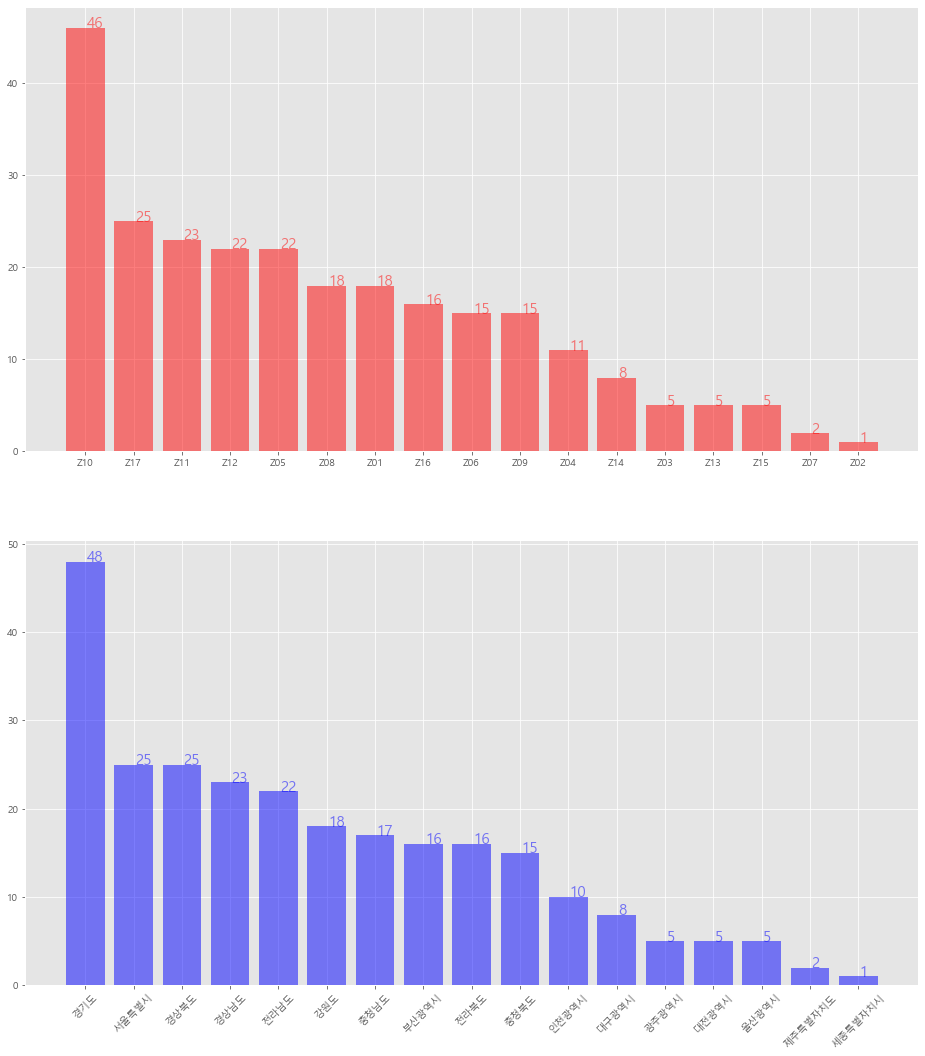

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,18))

ax[0].bar(x=df_zn_grp["zon_hlv"], height=df_zn_grp["zon_mcls"], color="red", alpha=.5)
x_loc = 0.03
for val in df_zn_grp["zon_mcls"]:
    ax[0].text(x=x_loc, y=val, s=f"{val}", size=15, color="red", alpha=.5)
    x_loc+=1

ax[1].bar(x=sido_name, height=sgg_num, color="blue", alpha=.5)
x_loc = 0.03
for val in sgg_num:
    ax[1].text(x=x_loc, y=val, s=f"{val}", size=15, color="blue", alpha=.5)
    x_loc+=1
ax[1].set_xticklabels(labels=sido_name, rotation=45)
plt.show()

- 완벽히 구분이 일치하는 시도가 많이 존재하지 않음
- 제휴사 데이터 세트와 연관지어 유추하는 것도 괜찮은 방법 (그러나 cop_c에 따른 크롤링을 통해 검색을 해봐야 할 수도 있음)
- 마스킹으로 둘지, 유추하여 결과를 도출할지는 기획 수립 시 결정

## 3.2.제휴사 이용 데이터 결합
---

In [37]:
df_aff = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv")
df_aff.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [38]:
df_store.head()

,br_c,cop_c,zon_hlv,zon_mcls,cop_c_k
0,A010001,A01,Z17,Z17024,유통사
1,A010002,A01,Z17,Z17018,유통사
2,A010003,A01,Z17,Z17011,유통사
3,A010004,A01,Z16,Z16007,유통사
4,A010005,A01,Z17,Z17005,유통사


In [39]:
df_merge = pd.merge(left=df_aff, right=df_store.drop("cop_c", axis=1), how="left", on="br_c")
pd.set_option("display.max_columns", None)
df_merge

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,zon_hlv,zon_mcls,cop_c_k
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,Z17,Z17024,숙박업종
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,Z17,Z17024,숙박업종
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,Z17,Z17024,숙박업종
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,Z17,Z17024,숙박업종
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,Z17,Z17018,F&B
...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,Z17,Z17018,엔터테인먼트
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,Z17,Z17018,엔터테인먼트
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,Z14,Z14005,엔터테인먼트
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,Z17,Z17013,엔터테인먼트


In [40]:
df_pvtb1 = pd.pivot_table(data=df_merge, index="zon_hlv", columns="cop_c_k", aggfunc="count", values="cop_c")
df_pvtb2 = pd.pivot_table(data=df_merge, index="zon_hlv", columns="cop_c", aggfunc="count", values="cop_c_k")

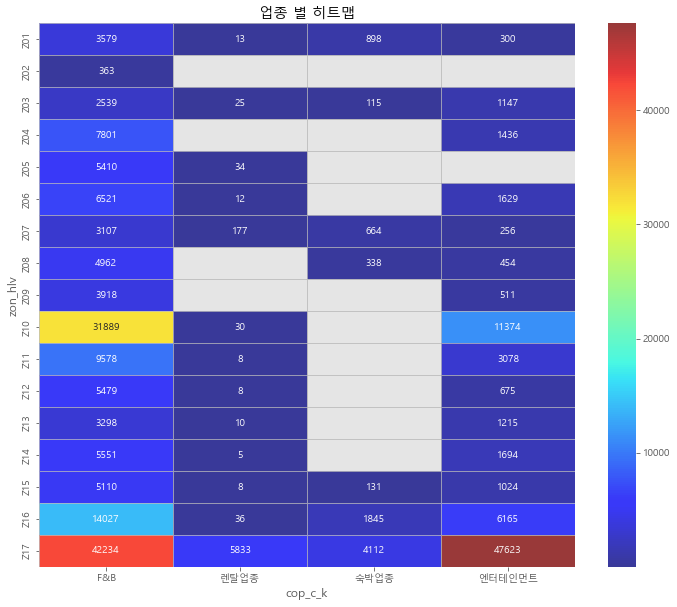

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_pvtb1,
            annot=True,
            fmt = ".0f",
            linecolor="silver",
            linewidths=1,
            cmap="jet",
            alpha=.75
            )
plt.title("업종 별 히트맵")
plt.show()

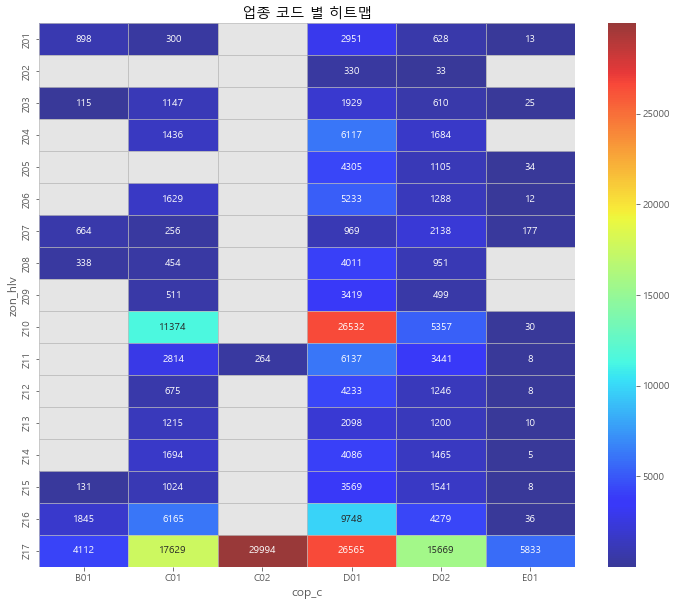

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_pvtb2,
            annot=True,
            fmt = ".0f",
            linecolor="silver",
            linewidths=1,
            cmap="jet",
            alpha=.75
            )
plt.title("업종 코드 별 히트맵")
plt.show()